# Building a Neural Net based on Chapter 7 of *Essential Math for Data Science*

Braaaaaaiiiinnnnssss. Oh wait, nope, just a neural net for prediction.

We're going to apply a neural network to employee retention data found [here](https://raw.githubusercontent.com/thomasnield/machine-learning-demo-data/master/classification/employee_retention_analysis.csv). 

In [37]:
# import our libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from yellowbrick.classifier import ConfusionMatrix


# read in our data

df = pd.read_csv("https://raw.githubusercontent.com/thomasnield/machine-learning-demo-data/master/classification/employee_retention_analysis.csv")

# let's take a look at the data

df.head()

,SEX,AGE,PROMOTIONS,YEARS_EMPLOYED,DID_QUIT
0,0,25,2,3,0
1,0,30,2,3,0
2,0,26,2,3,0
3,0,25,1,2,0
4,0,28,1,2,0


In [25]:
# ok, so we want to predict whether or not an employee will quit

X = df.iloc[:, 0:4]

# our dependent variable will be whether or not someone quits
Y = df.iloc[:, 4]

In [28]:
# test-train split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/4)

In [50]:
# create the model object

nnet = MLPClassifier(solver = 'sgd'
                     , hidden_layer_sizes=(3, )
                     , activation = 'logistic'
                     , max_iter = 100_000
                     , learning_rate_init=0.5)

# fit the model
nnet.fit(X_train, Y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(3,),
              learning_rate_init=0.5, max_iter=100000, solver='sgd')

In [51]:
print("Training set score: %f" % nnet.score(X_train, Y_train))
# yikes

Training set score: 0.550000


In [52]:
print("Test set score: %f" % nnet.score(X_test, Y_test))

Test set score: 0.500000


/Users/jacobpstein/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


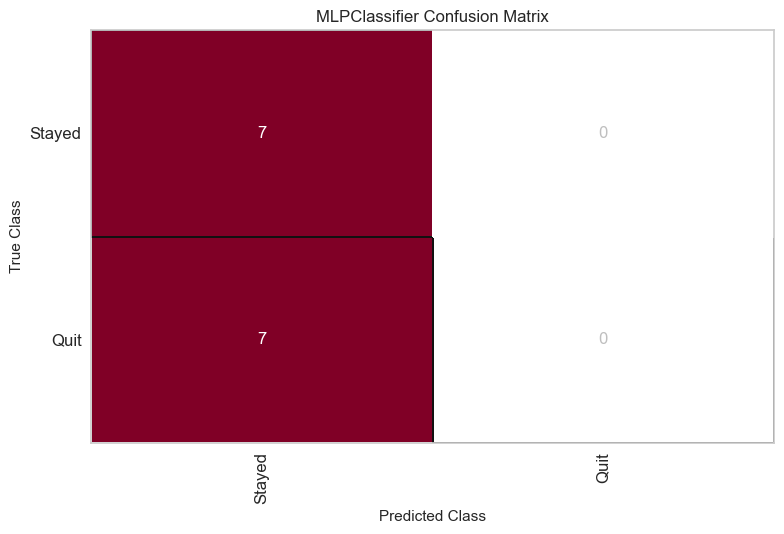

<Axes: title={'center': 'MLPClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [53]:
# confusion matrix


quit_cm = ConfusionMatrix(
    nnet, classes=['Stayed', 'Quit'],
    label_encoder={0: "Stayed", 1: "Quit"}
)

quit_cm.fit(X_train, Y_train)
quit_cm.score(X_test, Y_test)
quit_cm.show()